# Feature Extraction, Dimensionality Reduction

+ LinearDiscriminantAnalysis
+ PCA - principal component analysis
+ NMF - non-negative matrix factorization


Feature selection is a process that select (most) imporant features.  The selected features are there.

Feature extract is a process that generally creates new features.  The outcome is generally a smaller set of features.

A useful scenario for feature extraction is when the data has many many features, not all of which are useful, and some are inter-dependent on each other.

A good purpose of feature extractions is that the new features, depending on the method, are generally orthogonal.

A problem is that it's harder to understand, interpret these new features.



100 = 2 * 25 * 2 = 2 * (12*2 + 1) * 2


2 * (12 * 2 + 0) * 2 = 2 * 24 * 2 = 96


Dimensionality reduction is to extract few most important features after a "good" transformation.


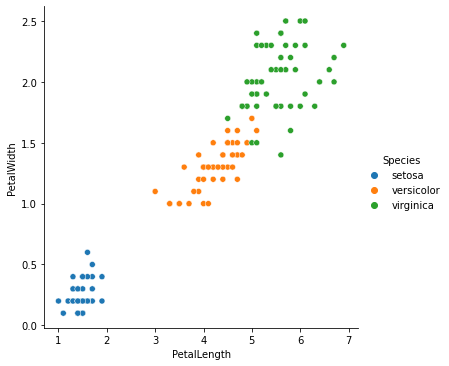

In [1]:
import seaborn, pandas

iris = pandas.read_csv('../Datasets/iris.csv')
# X, y = iris.drop(columns=['Species']), iris['Species']
X, y = iris[['PetalLength','PetalWidth']], iris['Species']

seaborn.relplot(data=iris, x='PetalLength', y='PetalWidth', hue='Species')

In [2]:
X.sample(3)

,PetalLength,PetalWidth
49,1.4,0.2
66,4.5,1.5
135,6.1,2.3


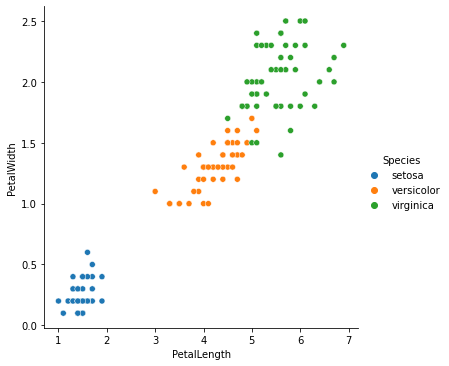

In [4]:
from sklearn.decomposition import PCA
pca = PCA()
iris = pandas.read_csv('../Datasets/iris.csv')

X, y = iris.drop(columns=['Species']), iris['Species']
# X, y = iris[['PetalLength','PetalWidth']], iris['Species']

X_pca = pca.fit_transform(X)
iris['pca1'] = X_pca[:, 0]
iris['pca2'] = X_pca[:, 1]

seaborn.relplot(data=iris, x='PetalLength', y='PetalWidth', hue='Species')

In [5]:
display(iris.head(2))

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,pca1,pca2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001


In [6]:
X_pca[:3]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02]])

In [4]:
iris.var()

/var/folders/ts/z68_7mj53zvdfr6kdsxhhs6r0000gn/T/ipykernel_56006/2384711547.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris.var()


SepalLength    0.685694
SepalWidth     0.189979
PetalLength    3.116278
PetalWidth     0.581006
pca1           4.228242
pca2           0.242671
dtype: float64

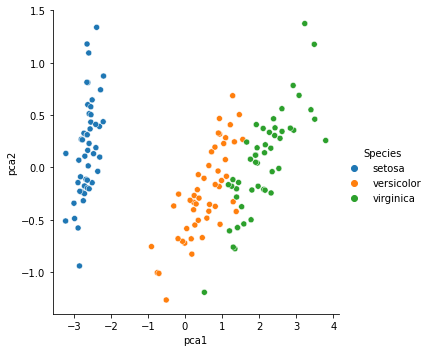

In [5]:
seaborn.relplot(data=iris, x='pca1', y='pca2', hue='Species')

In [7]:
diabetes = pandas.read_csv('../Datasets/diabetes.csv')

In [8]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit, cross_validate

diabetes = pandas.read_csv('../Datasets/diabetes.csv')
X, y = diabetes.drop(columns=['Outcome']), diabetes['Outcome']
scaler = StandardScaler()
pca = PCA()
X_std = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_std)

In [10]:
def evaluate(model, X, y, cv, scoring=['accuracy']):
    result = cross_validate(
        model, 
        X, 
        y, 
        cv=cv, 
        scoring=scoring)
    print(model)
    for s in scoring:
        print('\t', s, result['test_' + s].mean().round(2))
        

In [11]:
evaluate(RandomForestClassifier(), X, y, cv=ShuffleSplit(n_splits=50))

RandomForestClassifier()
	 accuracy 0.77


In [12]:
evaluate(RandomForestClassifier(), X_pca, y, cv=ShuffleSplit(n_splits=50))

RandomForestClassifier()
	 accuracy 0.75


In [13]:
pca = PCA(n_components=2)
X_std = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_std)
evaluate(RandomForestClassifier(), X_pca, y, cv=ShuffleSplit(n_splits=50))

RandomForestClassifier()
	 accuracy 0.67


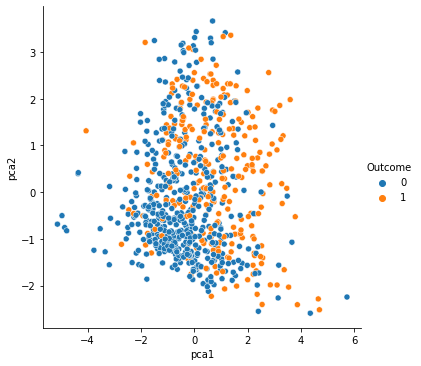

In [14]:
diabetes['pca1'] = X_pca[: , 0]
diabetes['pca2'] = X_pca[: , 1]
seaborn.relplot(data=diabetes, x='pca1', y='pca2', hue='Outcome')

#### Practice

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

def evaluate_new(model, X, y, scoring = ['accuracy'], random_state = 100):
    cv = ShuffleSplit(n_splits = 30, random_state = random_state)
    result = cross_validate(model, X, y, cv = cv, scoring = scoring)
    for s in scoring:
        print("\t", s, result['test_' + s].mean().round(2))

In [33]:
rf = RandomForestClassifier(n_estimators = 20)
svc = LinearSVC(dual = False)

X,y = diabetes.drop(columns = ['Outcome']), diabetes['Outcome'] 
print(f"Model {rf}")
evaluate_new(rf, X, y, ['precision', 'recall'])
print(f"Model {svc}")
evaluate_new(svc, X, y, ['precision', 'recall'])

Model RandomForestClassifier(n_estimators=20)
	 precision 0.66
	 recall 0.55
Model LinearSVC(dual=False)
	 precision 0.72
	 recall 0.58


#### Let's standardize the data and re-evaluate the models' performance

In [34]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

print(f"Model {rf}")
evaluate_new(rf, X_std, y, ['precision', 'recall'])
print(f"Model {svc}")
evaluate_new(svc, X_std, y, ['precision', 'recall'])

Model RandomForestClassifier(n_estimators=20)
	 precision 0.67
	 recall 0.55
Model LinearSVC(dual=False)
	 precision 0.72
	 recall 0.58


#### Let's use PCA to extract new features from the dataset and check the performance

In [35]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_std)

print(f"Model {rf}")
evaluate_new(rf, X_pca, y, ['precision', 'recall'])
print(f"Model {svc}")
evaluate_new(svc, X_pca, y, ['precision', 'recall'])

Model RandomForestClassifier(n_estimators=20)
	 precision 0.56
	 recall 0.46
Model LinearSVC(dual=False)
	 precision 0.62
	 recall 0.45


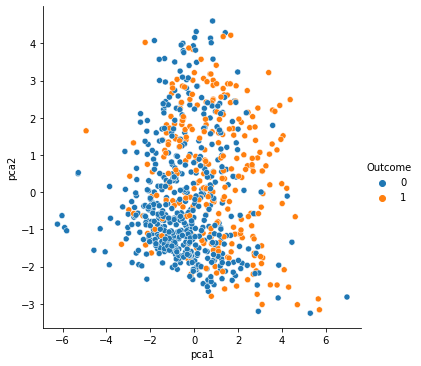

In [36]:
diabetes_copy = diabetes.copy()
diabetes_copy.drop(columns = ['pca1', 'pca2'], inplace = True)
diabetes_copy['pca1'] = X_pca[:, 0]
diabetes_copy['pca2'] = X_pca[:, 1]

import seaborn as sns
sns.relplot(data = diabetes_copy, x = 'pca1', y = 'pca2', hue = 'Outcome')

In [15]:
pca.fit(X_std)
pca.explained_variance_ratio_

array([0.26179749, 0.21640127])

In [ ]:
X, y = iris.drop(columns=['Species']), iris['Species']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
evaluate(RandomForestClassifier(), iris[['PetalLength','SepalLength']], y, cv=ShuffleSplit(n_splits=50))

In [ ]:
evaluate(RandomForestClassifier(), X_pca, y, cv=ShuffleSplit(n_splits=50))

In [ ]:
heart = pandas.read_csv('../../Datasets/heart.csv')
X, y = heart.drop(columns=['target']), heart['target']
pca = PCA(n_components=4)
pca.fit(X)

## Explain Variance using PCA

In [ ]:
pca.explained_variance_ratio_.round(2)

In [ ]:
X_pca = pca.fit_transform(X)

In [ ]:
cv = ShuffleSplit(n_splits=50)
evaluate(RandomForestClassifier(), X, y, cv)

In [ ]:
evaluate(RandomForestClassifier(), X_pca, y, cv)

In [ ]:
X, y = diabetes.drop(columns=['Outcome']), diabetes['Outcome']
pca = PCA()
pca.fit(X)

In [ ]:
pca.explained_variance_ratio_.round(2)

In [ ]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

In [ ]:
evaluate(RandomForestClassifier(), X, y, cv)

In [ ]:
evaluate(RandomForestClassifier(), X_pca, y, cv)

In [ ]:
diabetes
X3 = diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin']]
evaluate(RandomForestClassifier(), X3, y, cv)

In [ ]:
seaborn.relplot(data=diabetes, x='Glucose', y='BMI', hue='Outcome')

In [ ]:
seaborn.relplot(data=diabetes, x='Glucose', y='BloodPressure', hue='Outcome')

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
diabetes['pca1'] = X_pca[: , 0]
diabetes['pca2'] = X_pca[: , 1]
seaborn.relplot(data=diabetes, x='pca1', y='pca2', hue='Outcome')

In [ ]:
evaluate(RandomForestClassifier(), X_pca, y, cv)

In [ ]:
evaluate(RandomForestClassifier(), X, y, cv)

In [ ]:
X.head()

### Summary

If we are domain experts and know which are the best features, our selection of features might give the best peformance.

If we do not know much about the domain, using PCA might give higher performance.

PCA - Principal component analysis

NMF - Non-negative matrix factorization

UMAP - do some research on this.

PCA and NMF factorize our data using matrix multiplication.


100 = 2 * (12*2 + 1*1) * 2

100 ~ 2 * (12*2 ) * 2

In [37]:
import pandas, seaborn

from sklearn.decomposition import PCA, NMF
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler


def evaluate(model, X, y, random_state=2021, scoring=['accuracy','precision','recall']):
    cv = ShuffleSplit(n_splits=20, random_state=random_state)
    result = cross_validate(
        model, 
        X, 
        y, 
        cv=cv, 
        scoring=scoring)
    print(model)
    for s in scoring:
        print('\t', s, result['test_' + s].mean().round(2))
        
rf = RandomForestClassifier(n_estimators=20, max_depth=5)

diabetes = pandas.read_csv('../Datasets/diabetes.csv')
X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']

In [3]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
evaluate(rf, X, y)

RandomForestClassifier(max_depth=5, n_estimators=20)
	 accuracy 0.75
	 precision 0.71
	 recall 0.52


In [5]:
y.value_counts(1)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

MinMaxScaler scales each feature to the range (0, 1).

StandardScaler scales each features to mean of 0 and deviation of 1.



In [16]:
X1[0]

array([ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
        0.20401277,  0.46849198,  1.4259954 ])

In [17]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [18]:
X.iloc[0]

Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Name: 0, dtype: float64

In [19]:
X2[0]

array([0.35294118, 0.74371859, 0.59016393, 0.35353535, 0.        ,
       0.50074516, 0.23441503, 0.48333333])

In [25]:
X.Age.min(), X.Age.max(), (50-X.Age.min())/(X.Age.max() - X.Age.min())

(21, 81, 0.48333333333333334)

In [49]:
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X1)

scaler2 = MinMaxScaler()
X2 = scaler2.fit_transform(X)
nmf = NMF()
X_nmf = nmf.fit_transform(X2)

/Users/vphan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/vphan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [50]:
evaluate(rf, X_pca, y)

RandomForestClassifier(max_depth=5, n_estimators=20)
	 accuracy 0.74
	 precision 0.71
	 recall 0.46


In [51]:
evaluate(rf, X_nmf, y)

RandomForestClassifier(max_depth=5, n_estimators=20)
	 accuracy 0.76
	 precision 0.75
	 recall 0.52


In [52]:
evaluate(rf, X, y)

RandomForestClassifier(max_depth=5, n_estimators=20)
	 accuracy 0.76
	 precision 0.72
	 recall 0.52


PCA and NMF transform the original data into new dimensions (features) that are orthogonal.


In [53]:
pca.fit(X,y)

PCA()

In [54]:
pca.explained_variance_ratio_.round(3)

array([0.889, 0.062, 0.026, 0.013, 0.007, 0.003, 0.001, 0.   ])

The first 5 principal components explain essentially all the variance in the data.  These 5 new components essentially capture the knowledge in this data.

In [55]:
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X1)
evaluate(rf, X_pca, y)

RandomForestClassifier(max_depth=5, n_estimators=20)
	 accuracy 0.73
	 precision 0.68
	 recall 0.47


Each of the 5 components is a new feature.   These do not exist in the original dataset.

These 5 new features capture essentially all variance in the original data.

The problem is we don't understand these features.  Part of it is that these values can be negative. Because of that, it's hard to interpret them as a physical thing.

In [57]:
nmf.fit(X2,y)

/Users/vphan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/vphan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF()

In [59]:
X_nmf

array([[0.13292039, 0.09073479, 0.07796034, ..., 0.05536787, 0.08246203,
        0.        ],
       [0.12284009, 0.01508456, 0.06468917, ..., 0.0277995 , 0.0639229 ,
        0.        ],
       [0.12805691, 0.12100325, 0.        , ..., 0.06094921, 0.07792932,
        0.        ],
       ...,
       [0.13698677, 0.07560613, 0.04968422, ..., 0.01626305, 0.0651114 ,
        0.04399738],
       [0.12007276, 0.01508441, 0.        , ..., 0.02607997, 0.1142916 ,
        0.        ],
       [0.13020209, 0.01508156, 0.06917267, ..., 0.02440705, 0.07719306,
        0.        ]])

If we use NMF, the new features may correspond to some physical things.

In [61]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [39]:
scaler = MinMaxScaler()
pca = PCA(n_components=2)
X_std = scaler.fit_transform(X)

X_pca = pca.fit_transform(X_std)
diabetes['pca1'] = X_pca[:, 0]
diabetes['pca2'] = X_pca[:, 1]

nmf = NMF(n_components=2)
X_nmf = nmf.fit_transform(X_std)
diabetes['nmf1'] = X_nmf[:, 0]
diabetes['nmf2'] = X_nmf[:, 1]

/Users/vphan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/Users/vphan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [43]:
evaluate(rf, X, y, cv, scoring=['accuracy','precision','recall'])

RandomForestClassifier(max_depth=5, n_estimators=20)
	 accuracy 0.76
	 precision 0.67
	 recall 0.57


In [44]:
evaluate(rf, X_pca, y, cv, scoring=['accuracy','precision','recall'])

RandomForestClassifier(max_depth=5, n_estimators=20)
	 accuracy 0.7
	 precision 0.62
	 recall 0.39


In [45]:
evaluate(rf, X_nmf, y, cv, scoring=['accuracy','precision','recall'])

RandomForestClassifier(max_depth=5, n_estimators=20)
	 accuracy 0.71
	 precision 0.63
	 recall 0.49


In [63]:
rf.fit(X,y)
sorted(zip(rf.feature_importances_, X.columns))

[(0.03379024802109052, 'SkinThickness'),
 (0.03827077872561398, 'BloodPressure'),
 (0.054696345416480344, 'Insulin'),
 (0.09832163174951447, 'DiabetesPedigreeFunction'),
 (0.09884687092040557, 'Pregnancies'),
 (0.14240034988363978, 'Age'),
 (0.173931781888244, 'BMI'),
 (0.35974199339501134, 'Glucose')]

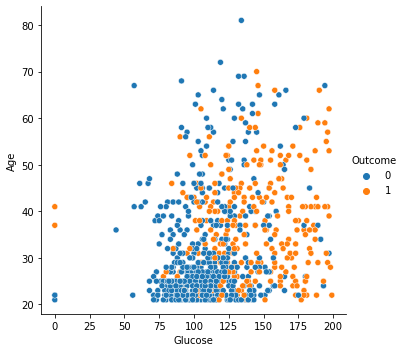

In [50]:
seaborn.relplot(data=diabetes, x='Glucose', y='Age', hue='Outcome')

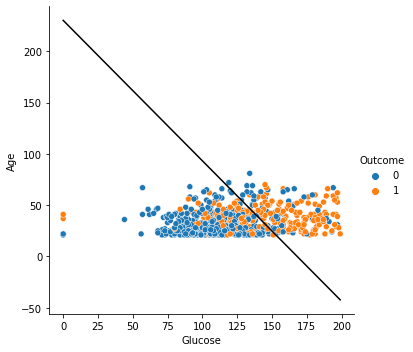

In [53]:
from interpret_models import show_boundary
from sklearn.svm import LinearSVC
svm = LinearSVC(dual=False)
show_boundary(svm, X, y, 'Glucose', 'Age')

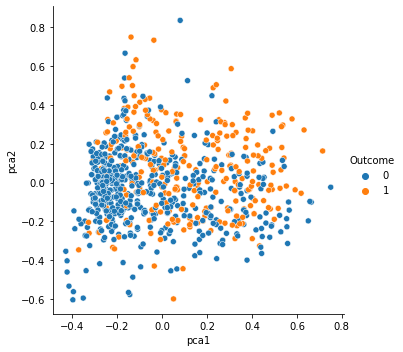

In [54]:
seaborn.relplot(data=diabetes, x='pca1', y='pca2', hue='Outcome')


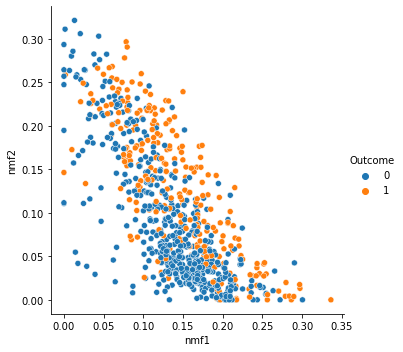

In [55]:
seaborn.relplot(data=diabetes, x='nmf1', y='nmf2', hue='Outcome')



In [64]:
new_data=X.sample(2)
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
77,5,95,72,33,0,37.7,0.370,27
640,0,102,86,17,105,29.3,0.695,27


In [65]:
nmf.fit_transform(new_data)

/Users/vphan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


array([[3.31711074e-04, 0.00000000e+00, 4.53158745e+00, 2.34466074e+00,
        2.67554953e+00, 8.63976351e+00, 8.75875733e-02, 0.00000000e+00],
       [6.55089453e+00, 4.51656026e+00, 1.68834498e+00, 1.07026994e+00,
        1.35502706e-01, 8.01782605e+00, 0.00000000e+00, 2.86404696e-01]])

In [66]:
rf.fit(X_nmf,y)

RandomForestClassifier(max_depth=5, n_estimators=20)

In [67]:
rf.predict( nmf.fit_transform(new_data) )

/Users/vphan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


array([0, 0])

In [68]:
y.loc[ [77,640]]

77     0
640    0
Name: Outcome, dtype: int64